In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model.n_neighbors

5

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.effective_metric_

'euclidean'

In [8]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [10]:
RMSE = [] 
#for train
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , " RMSE: ", rmse)

k = 1  RMSE:  0.0
k = 2  RMSE:  179.52761335480352
k = 3  RMSE:  205.20157172291863
k = 4  RMSE:  220.5139794876305
k = 5  RMSE:  239.6467132541376
k = 6  RMSE:  243.5904190007242
k = 7  RMSE:  258.1478781634636
k = 8  RMSE:  266.05374203349805
k = 9  RMSE:  269.73782093553376
k = 10  RMSE:  271.2798300436963


In [11]:
RMSE = [] 
#for test
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , " RMSE: ", rmse)

k = 1  RMSE:  455.03925390751965
k = 2  RMSE:  415.99629571490965
k = 3  RMSE:  420.6765370082348
k = 4  RMSE:  428.8564674588792
k = 5  RMSE:  426.6570764525201
k = 6  RMSE:  423.5071669008732
k = 7  RMSE:  414.9361222421057
k = 8  RMSE:  413.7094731463598
k = 9  RMSE:  417.84419990871265
k = 10  RMSE:  421.6252180741266


In [12]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)
knn_cv_model.best_params_["n_neighbors"]

8

In [13]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "RMSE: ", rmse, "RMSE_CV: ", rmse_cv )


k = 1 RMSE:  0.0 RMSE_CV:  325.3947514706382
k = 2 RMSE:  179.52761335480352 RMSE_CV:  293.24000183333817
k = 3 RMSE:  205.20157172291863 RMSE_CV:  283.7486667487823
k = 4 RMSE:  220.5139794876305 RMSE_CV:  286.3240222024089
k = 5 RMSE:  239.6467132541376 RMSE_CV:  290.0705466132226
k = 6 RMSE:  243.5904190007242 RMSE_CV:  298.1263115575851
k = 7 RMSE:  258.1478781634636 RMSE_CV:  294.77070479194987
k = 8 RMSE:  266.05374203349805 RMSE_CV:  291.98672028891235
k = 9 RMSE:  269.73782093553376 RMSE_CV:  295.7162739573105
k = 10 RMSE:  271.2798300436963 RMSE_CV:  301.31047022701154


In [29]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [30]:
from sklearn.svm import SVR
svr_model = SVR("linear").fit(X_train, y_train)

svr_model.predict(X_train)[0:5]

print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [31]:
y_pred = svr_model.predict(X_train)

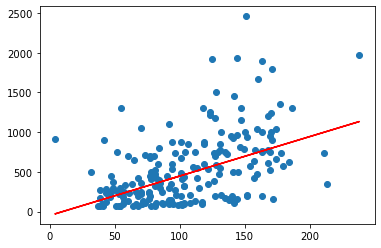

In [32]:
plt.scatter(X_train, y_train);
plt.plot(X_train,y_pred, color = "r");

In [21]:
svr_model.predict([[91]])


array([403.52804878])

In [22]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [23]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [26]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [25]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

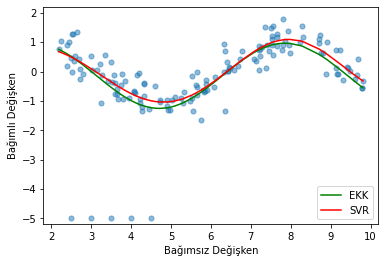

In [33]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]


from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [37]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [38]:
svr_rbf = SVR("rbf").fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

In [39]:
svr_rbf

SVR()

In [40]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [41]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [42]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

In [43]:
y_pred = svr_tuned.predict(X_train)

np.sqrt(mean_squared_error(y_train, y_pred))

323.54591099068784

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
mlp_model
mlp_model.n_layers_
mlp_model.hidden_layer_sizes

(100, 20)

In [9]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(100, 20))


475.8047014685692

In [11]:
mlp_model = MLPRegressor(hidden_layer_sizes = (20,100)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(20, 100))


430.22949737464126

In [12]:
mlp_model = MLPRegressor(hidden_layer_sizes = (20,20)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(20, 20))


617.265023658605

In [13]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(100, 100))


356.6983035726574

In [15]:
mlp_model
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [19]:
mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (100,50,150))
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 50, 150))

In [20]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

362.26396895855567

In [21]:
y_pred = mlp_tuned.predict(X_train_scaled)
np.sqrt(mean_squared_error(y_train, y_pred))

294.67945813288406